# Lecture 14

## Attention Mechanisms, Transformer Architecture, Unsupervised Pre-Training with GPT and BERT

### RNNs for Machine Translation
* Issues with using RNNs for Machine Translation:
    * For long phrases, fixed-length encoded representation becomes information bottleneck (difficult to embed a long phrase in a fixed-length vector)
    * Not everything in the input sequence is equally important to predict each word in the decoder

### Attention Mechanisms
* Instead of throwing away hidden state vectors in the source sequence, maintain a sequence of these vectors
* For each time step during decoding, select which positions in the source sentence contain the most relevant information
    * Compute a different **context vector $c_j$** for each target word $y_j$ as a weighted sum of representations for the input words
    * This is a type of *soft attention*
    * Encoder / Decoder / Attention weights are trained jointly
* Difference: look at entire sequence at the same time, rather than word by word
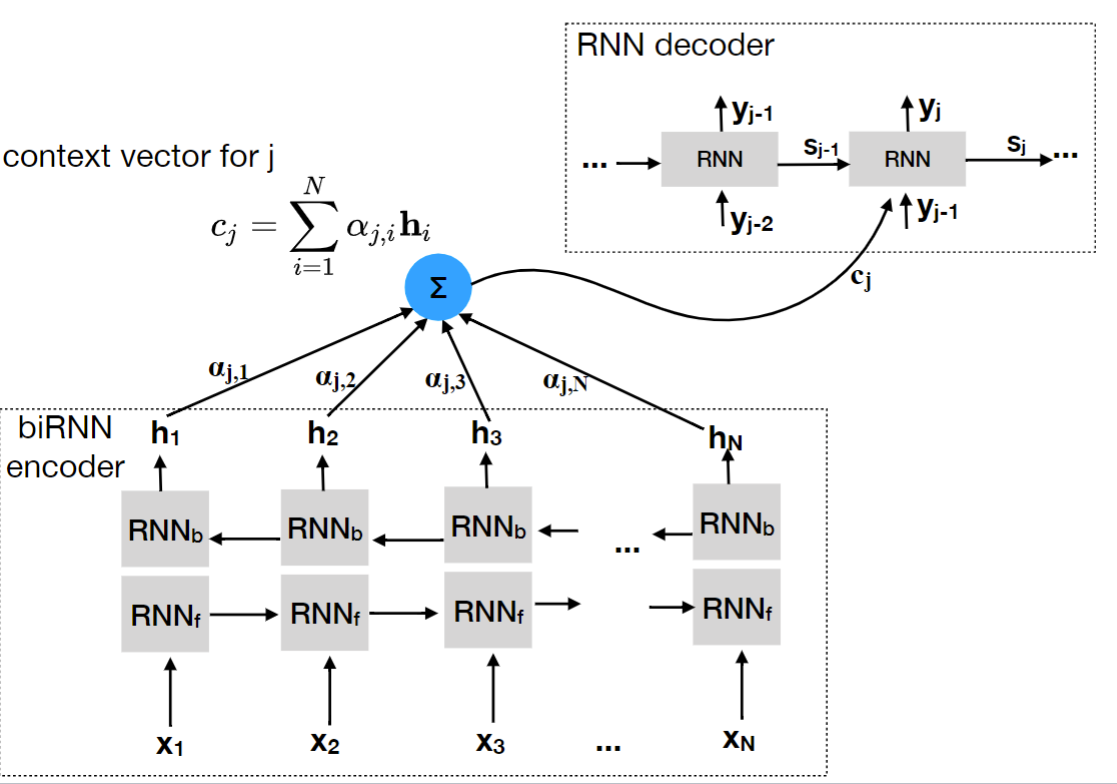


* Each weight $\alpha_{j, i}$ tells you how important the hidden state $h_i$ is to the representation

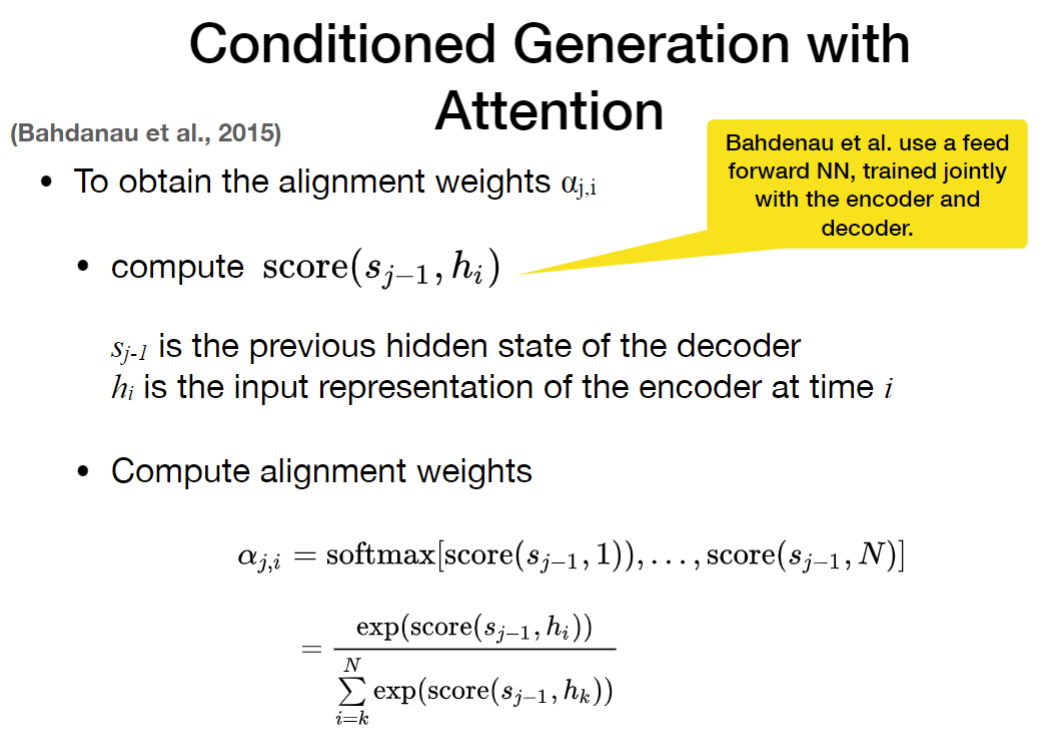

### Transformers
* Encoder-decoder architectures with attention can model long-distance dependencies between input and output
    * Problem: Training RNNs cannot be easily parallelized
* The **transformer** is a non-recurrent architecture for sequence modeling and transduction that is based exclusively on attention
* Uses **self-attention** to compute representations that depend on other representations in the same layer
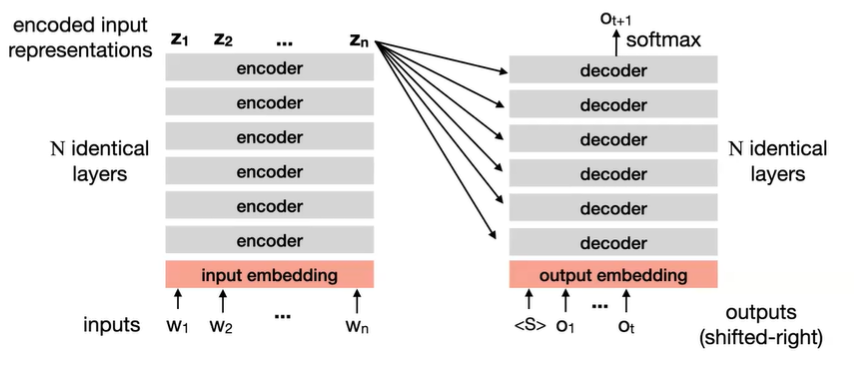


* Encode the input sequence using a stack of N encoders
* Generate one output word at a time, based on previous outputs and the encoded input
* Difference: involves using attention and layered encoders to create the input, rather than using a bidirectional RNN to create the input

### Transformer Architecture
* Each identical **encoder layer** consists of two sublayers
    * Multi-head self-attention
    * Fully-connected feed-forward (for each input position)
* Residual connections between sublayers
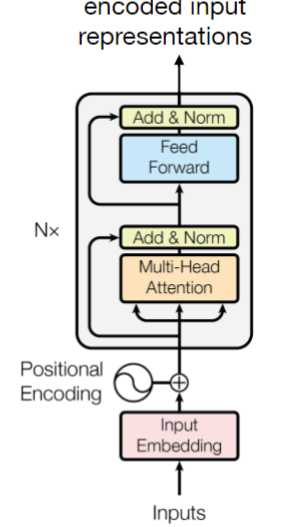

* Each identical **decoder layer** consists of three sublayers
* Decoder layer takes in the encoded input representation
    * multi-head self-attention, masked to prevent attention to unseen output positions
    * Multi-head attention to the input representation
    * Fully-connected feed-forward (for each position)
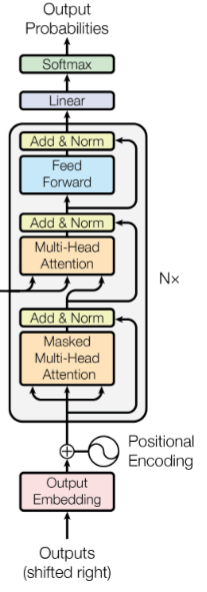

### Scaled Dot Product Attention
* Attention functions can be described as mapping a query and a set of key-value pairs to an output
$$\text{Attention}(q, k, v) = \text{softmax}(\text{score}(q, k))v$$

* Transformer uses a scaled dot product to compute the score
$$\text{score}(q, k) = \frac{q \cdot k}{\sqrt{d_k}}$$

where $d_k$ is the dimensionality of q and k

* Pack several queries and key/value pairs into matrices
$$ \text{Attention}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V
$$
* This is very efficient to compute, which makes it an attractive activation function

Q - query

K - key

V - value

### How Attention is Used
* Self attention:
    * Q, K, and V are all computed from the output representations of the previous layer (using linear transformations)
    * For decoder: "Mask" values of score(q, k) that correspond to connections to unseen outputs
* Encoder / decoder attention:
    * K, V are computed from the output of the encoder
    * Q is computed from the output of the previous decoder layer

### GPT (Generative PreTraining)
* Model consists of stacked transformer **decoder** layers
* Pre-trained using language modeling objective
* Aim is to maximize:
$$L_1 = \sum_{i} \log P(w_i | w_{i - k}, ..., w_{i - 1}; \Theta)$$

* Want to maximize the probability of a word given the last $k$ words, then fine-tune on a specific supervised problem

### GPT Fine Tuning
* Many NLP tasks can be set up as classification problems (ex. POS tagging, sentiment analysis). Training examples are pairs of input tokens and the corresponding output label
* Apply the pre-trained model to the input sequence
* Train a linear moel that uses the last transformer layer to predict the labels 
* Task-specific classification objective is to maximize:
$$ L_2 = \sum_{((x_1,...,x_m),y)} \log P(y | x_1, ..., x_m)
$$


* Combine the tasks of language modeling and classification by maximizing:
$$ L = L_2 + \lambda L_1
$$

### Applications of GPT Classification
* Classification (POS tagging, Sentiment Analysis)
* Entailment
* Document Similarity
* Multiple Choice (common sense reasoning)

### GPT Zero-Shot and One-Shot Learning
* Zero-shot: the model predicts the answer given only a natural language description of the task; no gradient updates are performed
* One-shot: the model provides an answer given a natural language description of the task **as well as an example**; no gradient updates are performed
* Few-shot: model is given a few examples of the task
* Chat GPT is also trained using Reinforcement Learning with human feedback

### BERT (Bidirectional Encoder Representations from Transformers)
* GPT's Language Modeling objective only takes left context into account (masked attention in transformer decoder layers)
    * This is particularly problematic for tasks that operate on multiple sentences (ex. entailment)
* Solution: use a "masked language model" objective for pre-training
    * Allows use of bidirectional self-attention (ex. transformer encoder layers rather than transformer decoder layers used in GPT)
* Secondary objective: next sentence prediction

 ### BERT Architecture
 * BERT consists of stacked transformer **encoder** layers (no masked attention) so representations can attend to the entire input sequence
 * The output of the last layer is a representation for each input token
 * Pack 2 sentences together in the input (pretraining and multi-sentence tasks), separated by a special [SEP] symbol
 * First position is a special classification token [CLS] used to compute a single representation of the input for classification tasks
 
 * Example: "My dog is cute. He likes playing"
     * Task: replace [dog] with [MASK] and compute probability of "dog" in this position given the tokens to the left ("My") and right ("is cute. He likes playing.")
     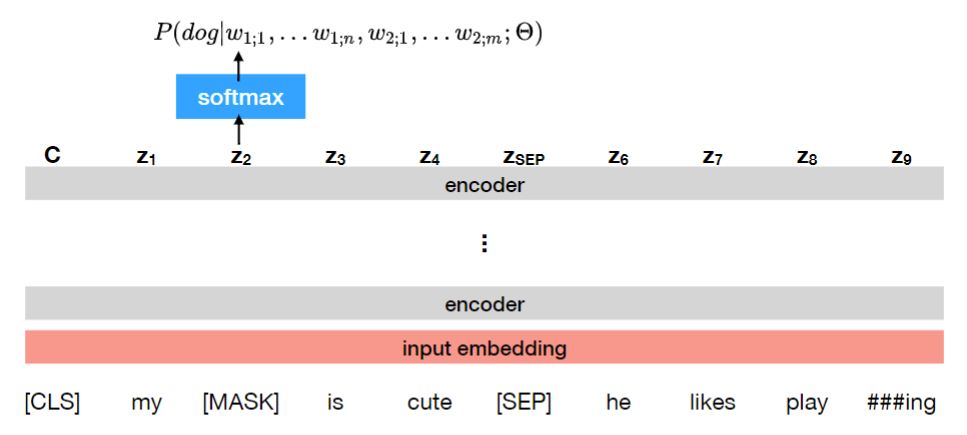
 
 
 * Randomly replace 15% of words with [MASK] symbol and find words with highest probability given the context -- compute cross entropy loss to measure model accuracy

### BERT Applications
* For sequence tasks: use output representations to make per-token predictions
* For classification tasks: use [CLS] representation to make a prediction